## Sanya Garg (2022UCA1826)
## AIHT Task 10

Social Media Sentiment Analysis

● Perform sentiment analysis on tweets using the rtweet package.

● Visualize the sentiment distribution and trends for specific hashtags or events.

In [ ]:
library(tidyverse)
library(textdata)
library(tm)
library(wordcloud)
library(syuzhet)
library(ggplot2)
library(lubridate)

# Load the dataset
sentiment <- read.csv("sentimentdataset.csv")

In [ ]:
# Compute sentiment scores
sentiment_scores <- get_sentiment(sentiment$Text, method = "nrc")
sentiment$sentiment_score <- sentiment_scores

# Display first few rows
head(sentiment)

,X,Unnamed..0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,sentiment_score
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>
1,0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12,2
2,1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8,-1
3,2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15,0
4,3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18,1
5,4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19,1
6,5,5,Feeling grateful for the little things in life.,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25,50,India,2023,1,16,9,1


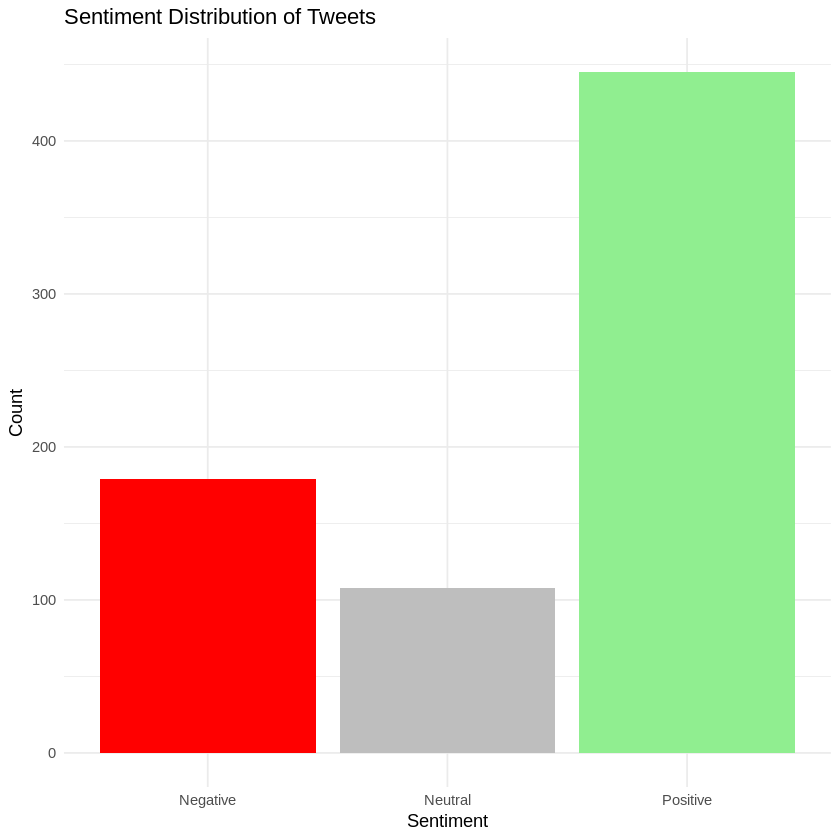

In [ ]:
# Sentiment distribution
sentiment_distribution <- sentiment %>%
  mutate(sentiment_label = ifelse(sentiment_score > 0, "Positive",
                           ifelse(sentiment_score < 0, "Negative", "Neutral"))) %>%
  count(sentiment_label)

# Plot sentiment distribution
ggplot(sentiment_distribution, aes(x = sentiment_label, y = n, fill = sentiment_label)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  theme_minimal() +
  labs(title = "Sentiment Distribution of Tweets", x = "Sentiment", y = "Count") +
  scale_fill_manual(values = c("Positive" = "lightgreen", "Negative" = "red", "Neutral" = "grey"))

In [ ]:
# Convert timestamp
sentiment$Timestamp <- as.POSIXct(sentiment$Timestamp, format="%Y-%m-%d %H:%M:%S")
sentiment$Year <- year(sentiment$Timestamp)
sentiment$Month <- month(sentiment$Timestamp)
sentiment$Day <- day(sentiment$Timestamp)

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


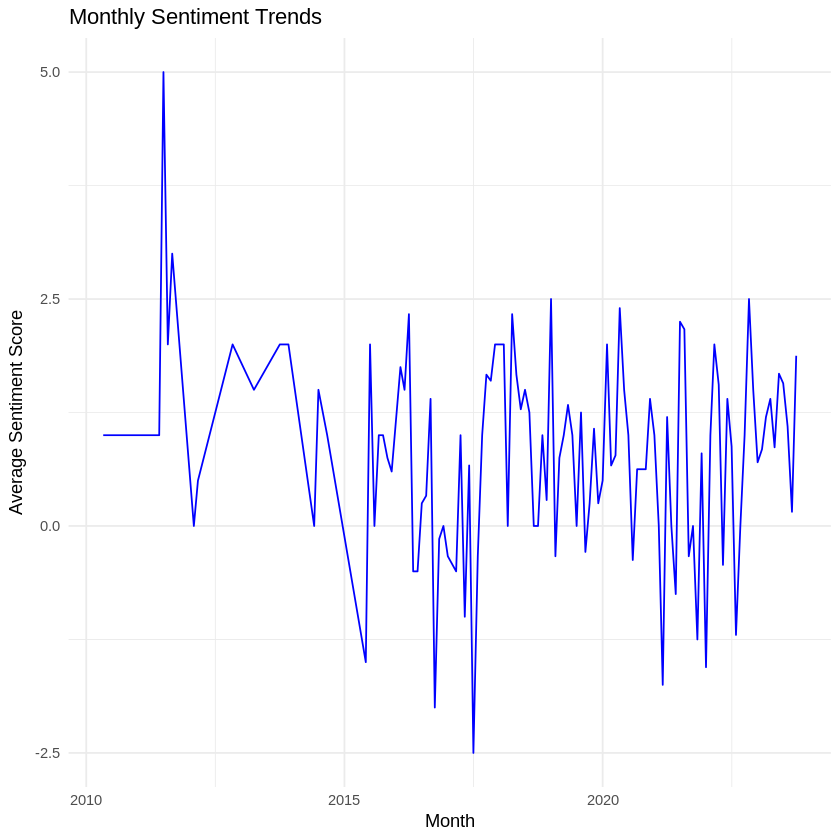

In [ ]:
# Monthly sentiment trend
monthly_sentiment <- sentiment %>%
  group_by(Year, Month) %>%
  summarise(avg_sentiment_score = mean(sentiment_score, na.rm = TRUE))

ggplot(monthly_sentiment, aes(x = as.Date(paste(Year, Month, 1, sep = "-")), y = avg_sentiment_score)) +
  geom_line(color = "blue") +
  theme_minimal() +
  labs(title = "Monthly Sentiment Trends", x = "Month", y = "Average Sentiment Score")

In [ ]:
# Extract positive and negative tweets
positive_tweets <- sentiment %>% filter(sentiment_score > 0)
negative_tweets <- sentiment %>% filter(sentiment_score < 0)

Warning message in tm_map.SimpleCorpus(positive_corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(positive_corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(positive_corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(positive_corpus, removeWords, stopwords("en")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(negative_corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(negative_corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(negative_corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(negative_corpus, removeWords, stopwords("en")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops

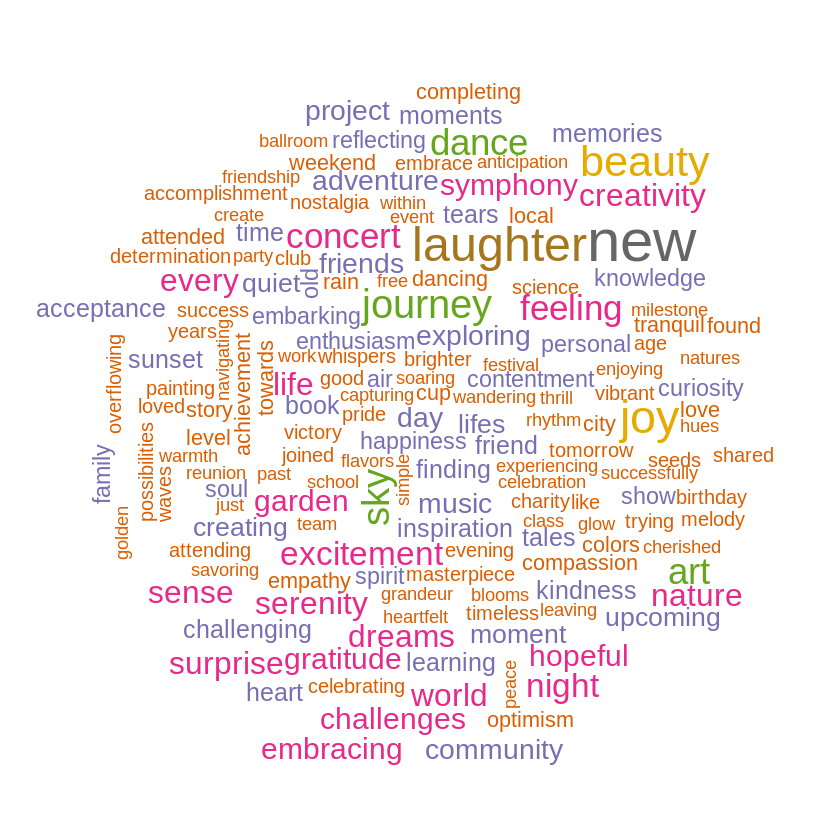

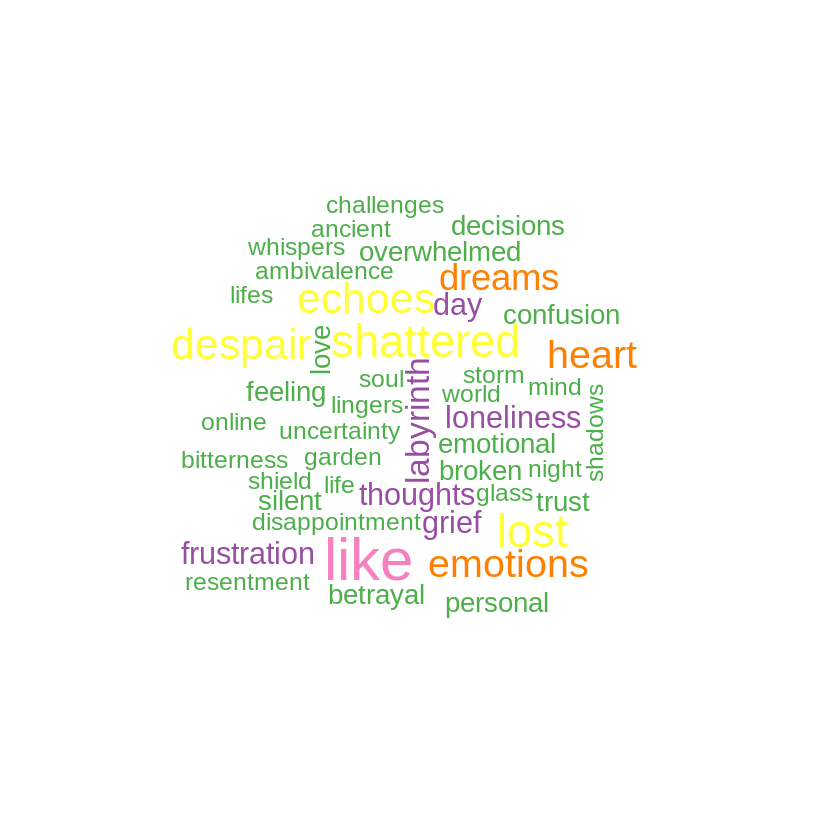

In [ ]:
# Create word clouds
positive_corpus <- Corpus(VectorSource(positive_tweets$Text))
positive_corpus <- tm_map(positive_corpus, content_transformer(tolower))
positive_corpus <- tm_map(positive_corpus, removePunctuation)
positive_corpus <- tm_map(positive_corpus, removeNumbers)
positive_corpus <- tm_map(positive_corpus, removeWords, stopwords("en"))

negative_corpus <- Corpus(VectorSource(negative_tweets$Text))
negative_corpus <- tm_map(negative_corpus, content_transformer(tolower))
negative_corpus <- tm_map(negative_corpus, removePunctuation)
negative_corpus <- tm_map(negative_corpus, removeNumbers)
negative_corpus <- tm_map(negative_corpus, removeWords, stopwords("en"))

wordcloud(words = unlist(strsplit(positive_corpus$content, " ")),
          min.freq = 5, scale = c(3, 0.5),
          colors = brewer.pal(8, "Dark2"))

wordcloud(words = unlist(strsplit(negative_corpus$content, " ")),
          min.freq = 5, scale = c(3, 0.5),
          colors = brewer.pal(8, "Set1"))


In [ ]:
# Filter tweets with hashtag "#Hope"
hashtag_tweets <- sentiment %>%
  filter(grepl("#Hope", Hashtags))

hashtag_sentiment_scores <- get_sentiment(hashtag_tweets$Text, method = "nrc")
hashtag_tweets$sentiment_score <- hashtag_sentiment_scores

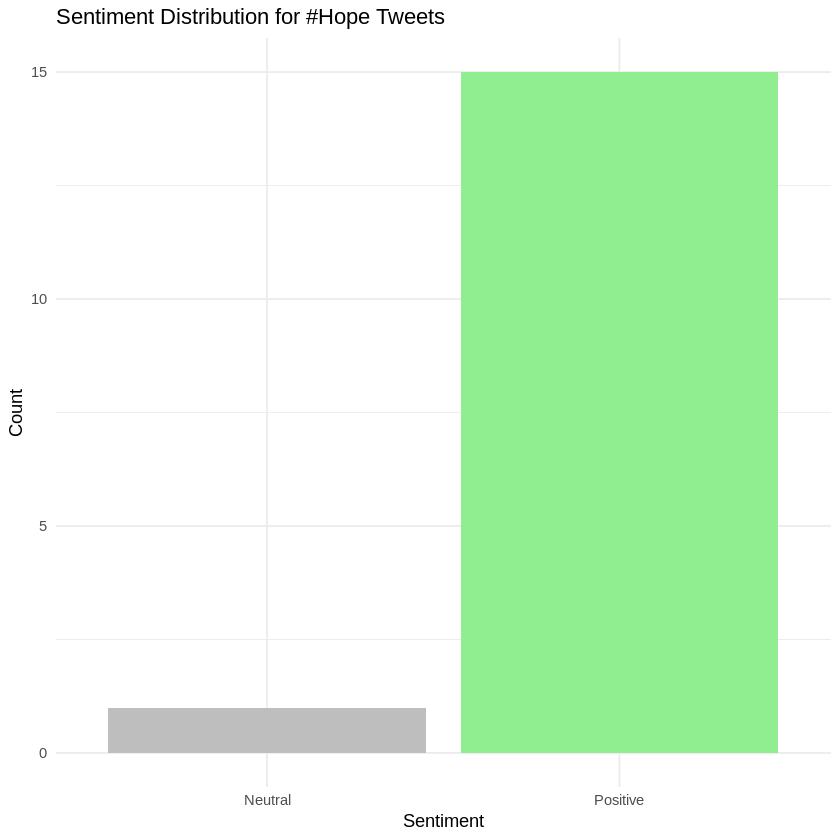

In [ ]:
# Sentiment distribution for hashtag-related tweets
hashtag_sentiment_distribution <- hashtag_tweets %>%
  mutate(sentiment_label = ifelse(sentiment_score > 0, "Positive",
                           ifelse(sentiment_score < 0, "Negative", "Neutral"))) %>%
  count(sentiment_label)

ggplot(hashtag_sentiment_distribution, aes(x = sentiment_label, y = n, fill = sentiment_label)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  theme_minimal() +
  labs(title = "Sentiment Distribution for #Hope Tweets", x = "Sentiment", y = "Count") +
  scale_fill_manual(values = c("Positive" = "lightgreen", "Negative" = "red", "Neutral" = "grey"))
